<img src="data/logo-ensae.jpg"> <img src="data/logo-ipparis.jpg">

**"Techniques Avancées d'apprentissage", S2 2018-19** 
# *One-class Classification with Support Vector Machine*  

  
**Tanguy CARROUSSEL**, *Mastère Spécialisé Data Science, ENSAE ParisTech*  
**Yosuke IJIRI**, *Mastère Spécialisé Data Science, ENSAE ParisTech*  

# Overview
- This is the coding part of the project. Report is prepared separately from this notebook.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [64]:
import numpy as np
import random
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import utils.mnist_reader as mnist_reader
import utils.tools as tls
import PIL.Image

## 1. Data

 - We use fashion-mnist data (source: https://github.com/zalandoresearch/fashion-mnist).
 - There are 60000 train data and 10000 test data; each of the data (item) respresents a set of 28*28 (784) pixels with gray scale ranging from 0 to 255.
 - Since we use unsupervised learning, we can concatenate train and test set into one large set.

In [23]:
# Load the dataset
X_train, y_train = mnist_reader.load_mnist('./data', kind='train')
X_test, y_test = mnist_reader.load_mnist('./data', kind='t10k')
X, y = np.concatenate((X_train, X_test), axis = 0), np.concatenate((y_train, y_test), axis = 0)
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (70000, 784)
Shape of y:  (70000,)


In [24]:
label_dic = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 
             5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

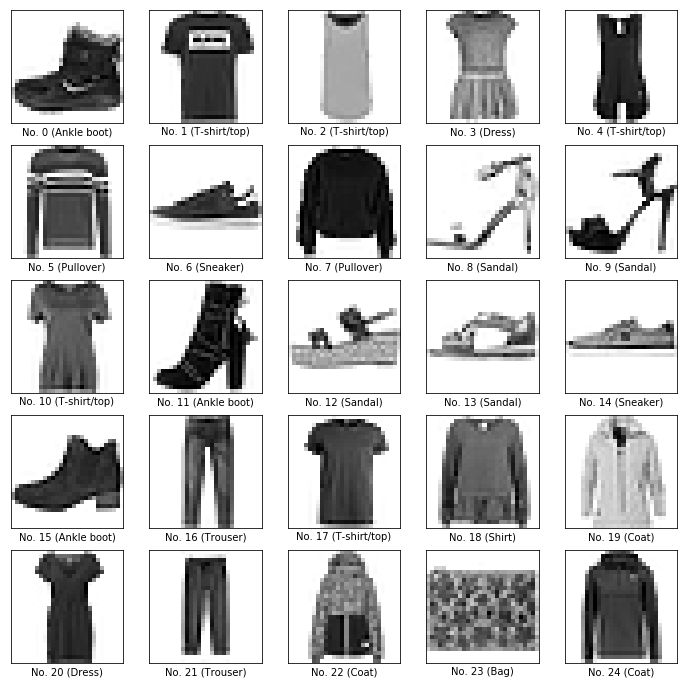

In [25]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([]), plt.yticks([])
    plt.xlabel("No. %d (%s)" %(i, label_dic[y_train[i]]))
    plt.imshow(X[i].reshape(28,28), cmap=plt.cm.binary)
#tls.save_image("./mnist/visualization/sample.png", X_train[0]) would be better to save sample outputs
#PIL.Image.fromarray(X_train.reshape((X_train.shape[0],28,28))[0]) is the visualisation part of the above saving code

- Create a dictionary that holds index information for each label.

In [26]:
idx_dic = {}
for i in range(10):
    idx_dic[i] = [idx for idx, label in enumerate(y) if label == i]

- Visualise sample images for each fashion item.

There are 7000 images of T-shirt/top. First 7 samples are:


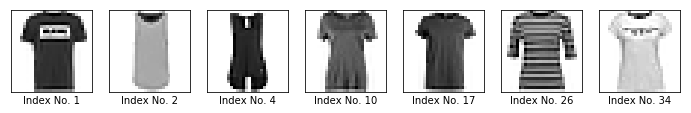

There are 7000 images of Trouser. First 7 samples are:


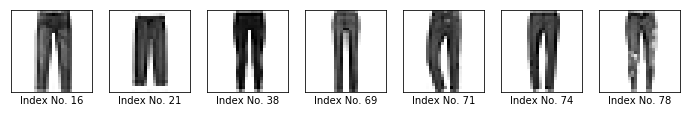

There are 7000 images of Pullover. First 7 samples are:


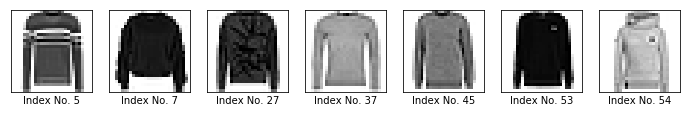

There are 7000 images of Dress. First 7 samples are:


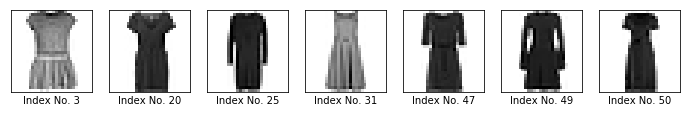

There are 7000 images of Coat. First 7 samples are:


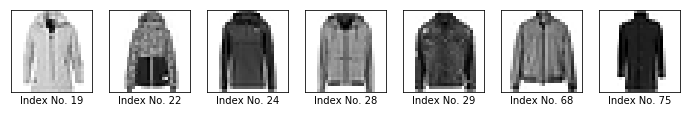

There are 7000 images of Sandal. First 7 samples are:


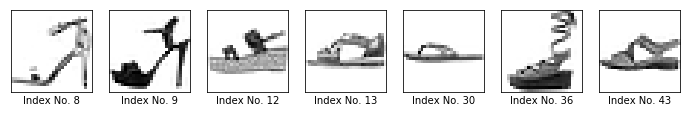

There are 7000 images of Shirt. First 7 samples are:


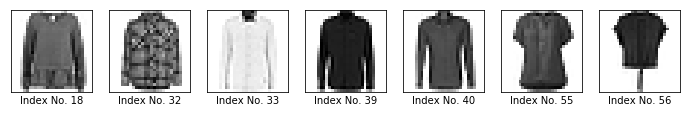

There are 7000 images of Sneaker. First 7 samples are:


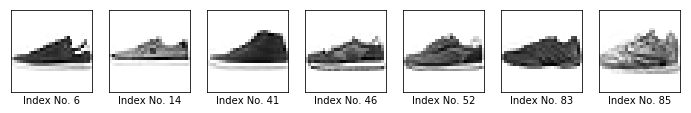

There are 7000 images of Bag. First 7 samples are:


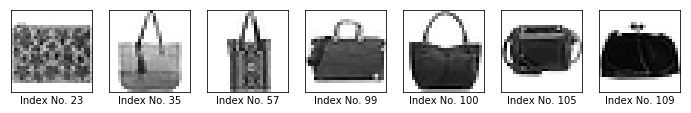

There are 7000 images of Ankle boot. First 7 samples are:


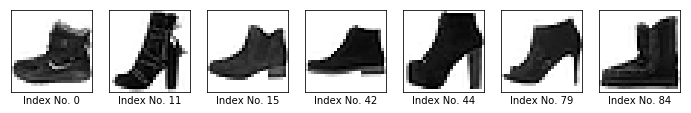

In [74]:
for i in range(10):
    print('There are %d images of %s. First 7 samples are:' %(len(idx_dic[i]), label_dic[i]))
    plt.figure(figsize=(12,12))
    for j in range(7):
        plt.subplot(1, 7, j+1)
        plt.xticks([]), plt.yticks([])
        plt.xlabel("Index No. %d" %idx_dic[i][j])
        plt.imshow(X[idx_dic[i]][j].reshape(28,28), cmap=plt.cm.binary)
    plt.show(), plt.close()

## 2. Model

* One-class SVM  
https://scikit-learn.org/0.15/modules/generated/sklearn.svm.OneClassSVM.html

In [76]:
from sklearn import svm

In [153]:
X0 = X[idx_dic[0]] / 255.0  # Normalise the data (To check if this is really effective or not)

In [183]:
clf = svm.OneClassSVM(kernel='rbf',
                      nu=0.01, 
                      degree=3,  # Only for ‘poly’; 3 by default
                      gamma='auto',  # Only for ‘rbf’, ‘poly’ and ‘sigmoid; 'auto' or float
                      coef0=0.0)  # Only for ‘poly’ and ‘sigmoid’; 0.0 by default
clf.fit(X0)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.01, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

[MEMO]
- (T-shirt, rbf) detects outliers to be eccentric-shaped T-shirts.
- (T-shirt, linear/poly/sigmoid) detects outliers to be white (light colour) T-shirts.

| T-shirt | nu | degree | gamma | coef0 |
|---|---|---|---|---|
| linear |0.01|×|×|×|
| poly |0.01|3|auto|0.0|
| rbf |0.01|×|auto (#anomalies increases if >> 0)|×|
| sigmoid |0.01|×|auto|0.0|

In [184]:
y_pred = clf.predict(X0)

In [185]:
predicted_outlier_index = np.where(y_pred == -1)  # Extract anomalies
predicted_normal_index = np.where(y_pred == 1)
predicted_outlier = X0[predicted_outlier_index]
len(predicted_outlier)

74

## 3. Result

### Visualisation of sample anomaly images
- We can see that sample T-shirt images predicted to be anomaly have indeed eccentric shape as a T-shirt. (Compare with the images of T-shirt that were predicted to be normal in the cell next.)

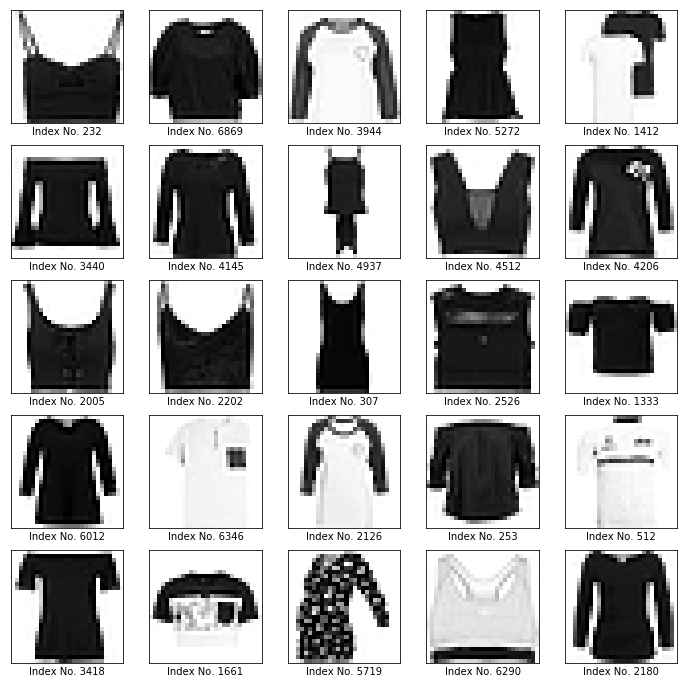

In [188]:
sample_idx = random.sample(list(predicted_outlier_index[0]), 25)
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([]), plt.yticks([])
    plt.xlabel("Index No. %d" %sample_idx[i])
    plt.imshow(X0[sample_idx][i].reshape(28,28), cmap=plt.cm.binary)

- Compare with the below sample images that were predicted to be normal. These indeed look regular styles of T-shirt to us.

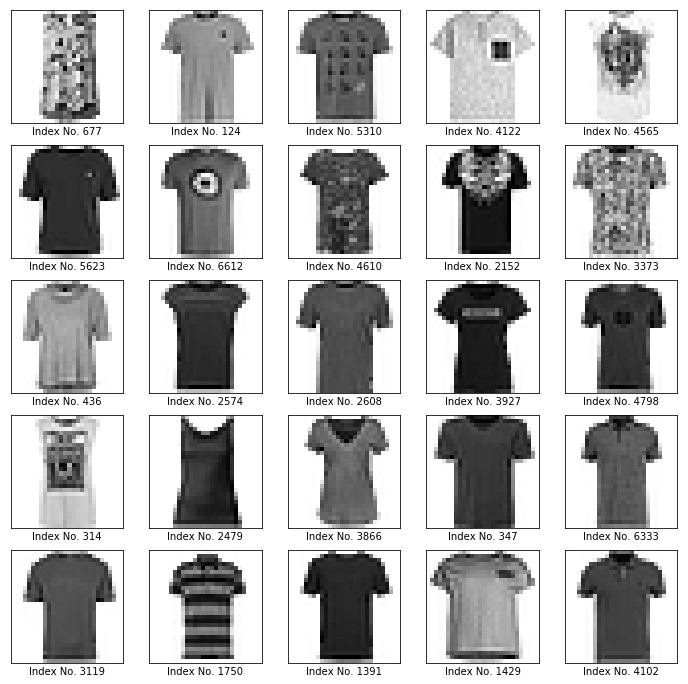

In [190]:
sample_idx = random.sample(list(predicted_normal_index[0]), 25)
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([]), plt.yticks([])
    plt.xlabel("Index No. %d" %sample_idx[i])
    plt.imshow(X0[sample_idx][i].reshape(28,28), cmap=plt.cm.binary)

[MEMO] We might be able to put all the data (T-shirt, Sandal, etc.) into the same model. In this case, according to the paper, the dimentionality is 10 (number of different labels). But I am not sure yet.

- Please refer to our report for conclusion.